<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/All_models_for_short_term_power_forecasting_Kaggle_turkey_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import seaborn as sns
import io
import datetime
import time
scalar=MinMaxScaler()

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

# **Dataframe** 

In [2]:
url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset

# **Reading the dataset**

In [3]:
df = pd.read_csv(url12)
df

,Date & Time,Active Power,Forecasted Power
0,8/1/2021 0:00,95.84,100.25
1,8/1/2021 0:10,96.03,100.01
2,8/1/2021 0:20,93.72,97.12
3,8/1/2021 0:30,88.84,96.96
4,8/1/2021 0:40,90.97,94.08
...,...,...,...
21971,12/31/2021 23:10,21.75,0.00
21972,12/31/2021 23:20,17.91,0.00
21973,12/31/2021 23:30,14.70,0.00
21974,12/31/2021 23:40,17.02,0.00


 **Dataframe column rename**

In [4]:
col_0=(df.columns)[0]
col_1=(df.columns)[1]
col_2=(df.columns)[2]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
feature_2 = 'Wind_speed'
df.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
df

,Date & Time,Active_Power,Forecasted Power
0,8/1/2021 0:00,95.84,100.25
1,8/1/2021 0:10,96.03,100.01
2,8/1/2021 0:20,93.72,97.12
3,8/1/2021 0:30,88.84,96.96
4,8/1/2021 0:40,90.97,94.08
...,...,...,...
21971,12/31/2021 23:10,21.75,0.00
21972,12/31/2021 23:20,17.91,0.00
21973,12/31/2021 23:30,14.70,0.00
21974,12/31/2021 23:40,17.02,0.00


**Convert the date column to datetime object**

In [5]:
df['Date & Time'] = pd.to_datetime(df['Date & Time']) 
df

,Date & Time,Active_Power,Forecasted Power
0,2021-08-01 00:00:00,95.84,100.25
1,2021-08-01 00:10:00,96.03,100.01
2,2021-08-01 00:20:00,93.72,97.12
3,2021-08-01 00:30:00,88.84,96.96
4,2021-08-01 00:40:00,90.97,94.08
...,...,...,...
21971,2021-12-31 23:10:00,21.75,0.00
21972,2021-12-31 23:20:00,17.91,0.00
21973,2021-12-31 23:30:00,14.70,0.00
21974,2021-12-31 23:40:00,17.02,0.00


**Active power convert to =>MW**

In [6]:
# df[feature_1]=df[feature_1].div(1000)
# df

**set the index to the Date time column**

In [7]:
df.set_index(feature_0,inplace=True) 

# **Exploratory Data Analysis (EDA)**

In [8]:
df.describe()

,Active_Power,Forecasted Power
count,"21,976.00","21,974.00"
mean,47.85,50.33
std,37.67,41.76
min,-0.76,0.00
25%,13.22,2.59
50%,37.43,47.42
75%,91.31,92.96
max,103.50,103.50


In [9]:
df.isnull().sum()

Active_Power        0
Forecasted Power    2
dtype: int64

**Visualization**

**correlation between the values**

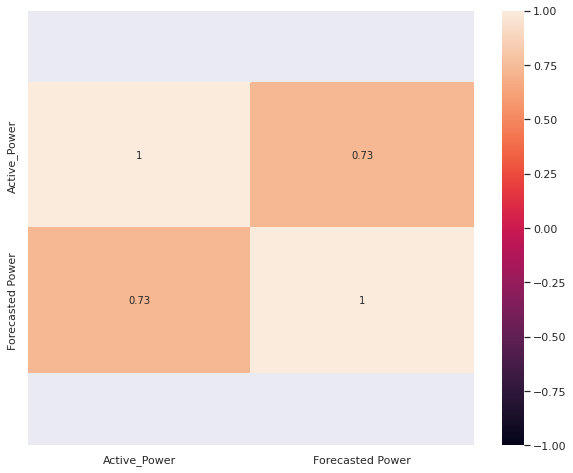

,Active_Power,Forecasted Power
Active_Power,1.00,0.73
Forecasted Power,0.73,1.00


In [10]:
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

# **Train an validation data set**

In [11]:
df=pd.DataFrame(df)
df_temp=df.copy()

In [12]:
df_temp

,Active_Power,Forecasted Power
Date & Time,,
2021-08-01 00:00:00,95.84,100.25
2021-08-01 00:10:00,96.03,100.01
2021-08-01 00:20:00,93.72,97.12
2021-08-01 00:30:00,88.84,96.96
2021-08-01 00:40:00,90.97,94.08
...,...,...
2021-12-31 23:10:00,21.75,0.00
2021-12-31 23:20:00,17.91,0.00
2021-12-31 23:30:00,14.70,0.00


In [13]:
df=df_temp[0:5000] #8/1/2021 0:00 to 9/30/2021 23:50

In [14]:
df

,Active_Power,Forecasted Power
Date & Time,,
2021-08-01 00:00:00,95.84,100.25
2021-08-01 00:10:00,96.03,100.01
2021-08-01 00:20:00,93.72,97.12
2021-08-01 00:30:00,88.84,96.96
2021-08-01 00:40:00,90.97,94.08
...,...,...
2021-09-05 01:50:00,101.28,101.38
2021-09-05 02:00:00,101.28,101.46
2021-09-05 02:10:00,101.11,101.72


**Divide train and validation sets**

In [15]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation train and validation**

In [16]:
T = 6
HORIZON = 1

In [17]:
scalar= MinMaxScaler()

In [18]:
def data_prepare(dataF,feature):
    dataF=pd.DataFrame(dataF[feature])
    dataF[feature] = scalar.fit_transform(dataF)
    dataF_shifted = dataF.copy()
    dataF_shifted['y_t+1'] = dataF_shifted[feature].shift(-1)
    print(dataF_shifted.head(10))

    for t in range(1, T+1):
        dataF_shifted[feature+'_t-'+str(T-t)] = dataF_shifted[feature].shift(T-t)
    dataF_shifted = dataF_shifted.rename(columns={feature:'Current_'+feature})

    # Discard any samples with missing values
    dataF_shifted = dataF_shifted.dropna(how='any')
    #train_shifted.head(10)

    Y_dataF = np.array(dataF_shifted['y_t+1'])
    X_dataF = np.array(dataF_shifted[[feature+'_t-'+str(T-t) for t in range(1, T+1)]])

    # This is an important step to reshape the X into 3 dimension array
    X_dataF = X_dataF.reshape(X_dataF.shape[0], T, 1)

    return X_dataF,Y_dataF,dataF_shifted 

In [19]:
X_train,Y_train,train_shifted = data_prepare(train,feature_1)

                     Active_Power  y_t+1
Date & Time                             
2021-08-01 00:00:00          0.93   0.93
2021-08-01 00:10:00          0.93   0.91
2021-08-01 00:20:00          0.91   0.86
2021-08-01 00:30:00          0.86   0.88
2021-08-01 00:40:00          0.88   0.90
2021-08-01 00:50:00          0.90   0.91
2021-08-01 01:00:00          0.91   0.94
2021-08-01 01:10:00          0.94   0.94
2021-08-01 01:20:00          0.94   0.92
2021-08-01 01:30:00          0.92   0.93


In [20]:
print(Y_train.shape)
print(X_train.shape)

(3994,)
(3994, 6, 1)


**Data preparation - Validation data**

In [21]:
X_valid,Y_valid,valid_shifted = data_prepare(valid,feature_1)

                     Active_Power  y_t+1
Date & Time                             
2021-08-29 04:00:00          0.95   0.94
2021-08-29 04:10:00          0.94   0.92
2021-08-29 04:20:00          0.92   0.93
2021-08-29 04:30:00          0.93   0.96
2021-08-29 04:40:00          0.96   0.95
2021-08-29 04:50:00          0.95   0.95
2021-08-29 05:00:00          0.95   0.96
2021-08-29 05:10:00          0.96   0.97
2021-08-29 05:20:00          0.97   0.97
2021-08-29 05:30:00          0.97   0.97


In [22]:
print(Y_valid.shape)
print(X_valid.shape)

(994,)
(994, 6, 1)


# **Implement the Deep learning model**

In [23]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import LSTM, GRU, Conv1D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
# UNITS = 5 # number of units in the RNN layer
# BATCH_SIZE = 32 # number of samples per mini-batch
# EPOCHS = 25 # maximum number of times the training algorithm will cycle through all samples

In [25]:
BATCH_SIZE = 32
EPOCHS = 30
model_no = 3

#1: Dilated CNN
#2: GRU
#3: LSTM

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
 def loss_plots_summary(model):
    model.compile(optimizer='RMSprop', loss='mse')
    print(model.summary())
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
    best_val = ModelCheckpoint('model_{epoch:02d}.h5', save_best_only=False, mode='min', period=1)

    history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_valid, Y_valid),callbacks=[earlystop, best_val],verbose=1)
    plot_loss = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
    plot_loss.plot(logy=True, figsize=(10,10), fontsize=12)
    plt.xlabel('epoch', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    print(plt.show())


In [28]:
def NN_model(model_no):
    if model_no == 1:
        LATENT_DIM = 10
        KERNEL_SIZE = 2
        model = Sequential()
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
        model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
        #model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=8))
        model.add(Flatten())
        model.add(Dense(HORIZON, activation='linear'))

        loss_plots_summary(model)

        path = '/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5'
        model.save(path)



    elif model_no==2:
        UNITS = 5 # number of units in the RNN layer
        model = Sequential()
        model.add(GRU(UNITS, input_shape=(T, 1)))
        model.add(Dense(HORIZON))

        loss_plots_summary(model)

        path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5'
        model.save(path)

    elif model_no==3:
      win_length=6
      num_feature=1
      model=tf.keras.Sequential()
      model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_feature),return_sequences=True))
      model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      model.add(tf.keras.layers.LSTM(32,return_sequences=True))
      model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      model.add(tf.keras.layers.Dropout(0.1))
      # model.add(tf.keras.layers.LSTM(64,return_sequences=True))
      # model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
      # model.add(tf.keras.layers.Dropout(0.1))
      model.add(tf.keras.layers.LSTM(16,return_sequences=False))
      model.add(tf.keras.layers.Dropout(0.1))
      model.add(tf.keras.layers.Dense(1))

      loss_plots_summary(model)

      path = '/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5'
      model.save(path)
    
    elif model_no==4:
      LATENT_DIM = 10
      KERNEL_SIZE = 2
      model=Sequential()
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
      model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
      model.add(LSTM(LATENT_DIM,return_sequences=True,input_shape=(T,1)))
      model.add(LSTM(LATENT_DIM,return_sequences=True))
      model.add(LSTM(LATENT_DIM))
      model.add(Flatten())
      model.add(Dense(HORIZON, activation='linear'))

      loss_plots_summary(model)

      path = '/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5'
      model.save(path)

    else:
      print("No models inserted")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 32)             12416     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 32)             0         
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

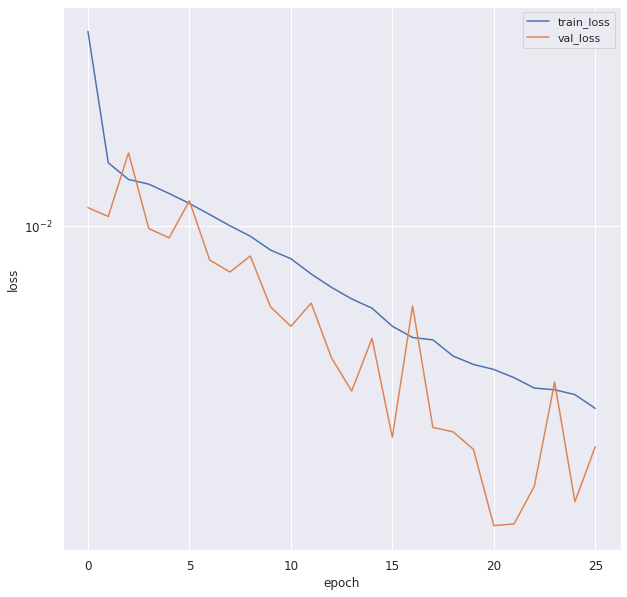

None


In [29]:
NN_model(model_no)

In [30]:
import tensorflow as tf
if model_no==1:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5')
elif model_no==2:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5')
elif model_no==3:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5')
elif model_no==4:
  model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5')

# **Test data**

In [31]:
# test_set_1 = df_temp[7000:7500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   test = test_set_1
# elif dataset_index==2:
#   test = test_set_2
# elif dataset_index==3:
#   test = test_set_3

In [32]:
test = pd.read_csv(url10)
test = test[6500:7000]
test

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
6500,19 02 2018 15:10,"3,427.84",11.68,"3,462.31",59.88
6501,19 02 2018 15:20,"3,482.68",12.12,"3,539.41",61.51
6502,19 02 2018 15:30,"3,597.89",12.82,"3,595.34",60.82
6503,19 02 2018 15:40,"3,577.99",12.49,"3,578.66",61.69
6504,19 02 2018 15:50,"3,338.12",11.83,"3,493.87",61.71
...,...,...,...,...,...
6995,23 02 2018 01:40,66.29,3.87,104.57,32.67
6996,23 02 2018 01:50,38.03,3.53,55.94,28.50
6997,23 02 2018 02:00,156.24,4.43,206.36,20.60
6998,23 02 2018 02:10,208.65,4.64,252.36,16.99


In [33]:
col_0=(test.columns)[0]
col_1=(test.columns)[1]
col_2=(test.columns)[2]
feature_0 = 'Date & Time'
feature_1 = 'Active_Power'
feature_2 = 'Wind_speed'
test.rename(columns={col_0 : feature_0 , col_1 : feature_1 },inplace=True)
print(test)
test['Date & Time'] = pd.to_datetime(test['Date & Time']) 
print(test)
test[feature_1]=test[feature_1].div(1000)
print(test)
test.set_index(feature_0,inplace=True) 
test

           Date & Time  Active_Power  Wind Speed (m/s)  \
6500  19 02 2018 15:10      3,427.84             11.68   
6501  19 02 2018 15:20      3,482.68             12.12   
6502  19 02 2018 15:30      3,597.89             12.82   
6503  19 02 2018 15:40      3,577.99             12.49   
6504  19 02 2018 15:50      3,338.12             11.83   
...                ...           ...               ...   
6995  23 02 2018 01:40         66.29              3.87   
6996  23 02 2018 01:50         38.03              3.53   
6997  23 02 2018 02:00        156.24              4.43   
6998  23 02 2018 02:10        208.65              4.64   
6999  23 02 2018 02:20        127.30              4.15   

      Theoretical_Power_Curve (KWh)  Wind Direction (°)  
6500                       3,462.31               59.88  
6501                       3,539.41               61.51  
6502                       3,595.34               60.82  
6503                       3,578.66               61.69  
6504         

,Active_Power,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date & Time,,,,
2018-02-19 15:10:00,3.43,11.68,"3,462.31",59.88
2018-02-19 15:20:00,3.48,12.12,"3,539.41",61.51
2018-02-19 15:30:00,3.60,12.82,"3,595.34",60.82
2018-02-19 15:40:00,3.58,12.49,"3,578.66",61.69
2018-02-19 15:50:00,3.34,11.83,"3,493.87",61.71
...,...,...,...,...
2018-02-23 01:40:00,0.07,3.87,104.57,32.67
2018-02-23 01:50:00,0.04,3.53,55.94,28.50
2018-02-23 02:00:00,0.16,4.43,206.36,20.60


In [34]:
count = (test[feature_1] == 0).sum()
count

224

In [35]:
test[feature_1]=test[feature_1].replace(0,test[feature_1].mean())
#test[feature_1]=test[feature_1].replace(0,test[feature_1].median())
# df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [36]:
X_test,Y_test,test_shifted = data_prepare(test,feature_1)

                     Active_Power  y_t+1
Date & Time                             
2018-02-19 15:10:00          0.95   0.97
2018-02-19 15:20:00          0.97   1.00
2018-02-19 15:30:00          1.00   0.99
2018-02-19 15:40:00          0.99   0.93
2018-02-19 15:50:00          0.93   0.96
2018-02-19 16:00:00          0.96   0.98
2018-02-19 16:10:00          0.98   0.96
2018-02-19 16:20:00          0.96   0.94
2018-02-19 16:30:00          0.94   0.86
2018-02-19 16:40:00          0.86   0.78


In [37]:
print(Y_test.shape)
print(X_test.shape)

(494,)
(494, 6, 1)


# **Predictions**

In [38]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(Y_test).ravel()
eval_df['prediction'] =predictions 
print(eval_df)



        0
0    0.94
1    0.95
2    0.93
3    0.91
4    0.82
..    ...
489 -0.04
490  0.01
491 -0.01
492  0.03
493  0.03

[494 rows x 1 columns]
            Date & Time    h  prediction  actual
0   2018-02-19 16:00:00  t+1        0.94    0.98
1   2018-02-19 16:10:00  t+1        0.95    0.96
2   2018-02-19 16:20:00  t+1        0.93    0.94
3   2018-02-19 16:30:00  t+1        0.91    0.86
4   2018-02-19 16:40:00  t+1        0.82    0.78
..                  ...  ...         ...     ...
489 2018-02-23 01:30:00  t+1       -0.04    0.02
490 2018-02-23 01:40:00  t+1        0.01    0.01
491 2018-02-23 01:50:00  t+1       -0.01    0.04
492 2018-02-23 02:00:00  t+1        0.03    0.06
493 2018-02-23 02:10:00  t+1        0.03    0.04

[494 rows x 4 columns]


In [39]:
eval_df

,Date & Time,h,prediction,actual
0,2018-02-19 16:00:00,t+1,0.94,0.98
1,2018-02-19 16:10:00,t+1,0.95,0.96
2,2018-02-19 16:20:00,t+1,0.93,0.94
3,2018-02-19 16:30:00,t+1,0.91,0.86
4,2018-02-19 16:40:00,t+1,0.82,0.78
...,...,...,...,...
489,2018-02-23 01:30:00,t+1,-0.04,0.02
490,2018-02-23 01:40:00,t+1,0.01,0.01
491,2018-02-23 01:50:00,t+1,-0.01,0.04
492,2018-02-23 02:00:00,t+1,0.03,0.06


In [40]:
eval_df[['prediction']]=scalar.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scalar.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual
0,2018-02-19 16:00:00,t+1,3.39,3.52
1,2018-02-19 16:10:00,t+1,3.42,3.47
2,2018-02-19 16:20:00,t+1,3.35,3.38
3,2018-02-19 16:30:00,t+1,3.27,3.09
4,2018-02-19 16:40:00,t+1,2.96,2.80
...,...,...,...,...
489,2018-02-23 01:30:00,t+1,-0.13,0.07
490,2018-02-23 01:40:00,t+1,0.04,0.04
491,2018-02-23 01:50:00,t+1,-0.05,0.16
492,2018-02-23 02:00:00,t+1,0.09,0.21


# **Evaluate the model**

**Performance metrics of our model**

In [41]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

from sklearn.metrics import r2_score

actual = eval_df['actual']
pred = eval_df['prediction']

print('MAE for model '+str(model_no)+'  = '+ str(round(mape(actual, pred),2))+' MW')
print('RMSE for model '+str(model_no)+' = '+ str(round(rmse(actual, pred),2))+' MW')
print('R^2 for model '+str(model_no)+'  = '+ str(round(r2_score(actual, pred),2)))

MAE for model 3  = 11.32 MW
RMSE for model 3 = 0.25 MW
R^2 for model 3  = 0.9


In [42]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="Model"+str(model_no)+": Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

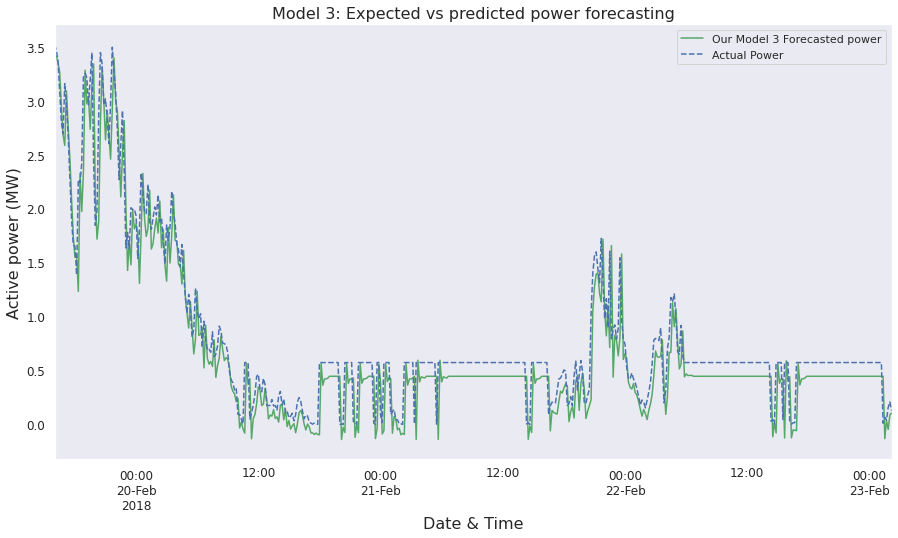

In [43]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("Model "+str(model_no)+": Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid() 
plt.legend(["Our Model "+str(model_no)+" Forecasted power", 'Actual Power'])
# plt.savefig("GRU-results.pdf")
plt.savefig("results.png")
plt.show()

# **All model plots together**

In [89]:
model_1=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/dilated_CNN_model.h5')
model_2=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/GRU_model.h5')
model_3=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/LSTM_model.h5')
model_4=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Weights/CNN+LSTM_model.h5')

In [90]:
predictions_1 = np.array(model_1(X_test))
predictions_2 = np.array(model_2(X_test))
predictions_3 = np.array(model_3(X_test))
predictions_4 = np.array(model_4(X_test))

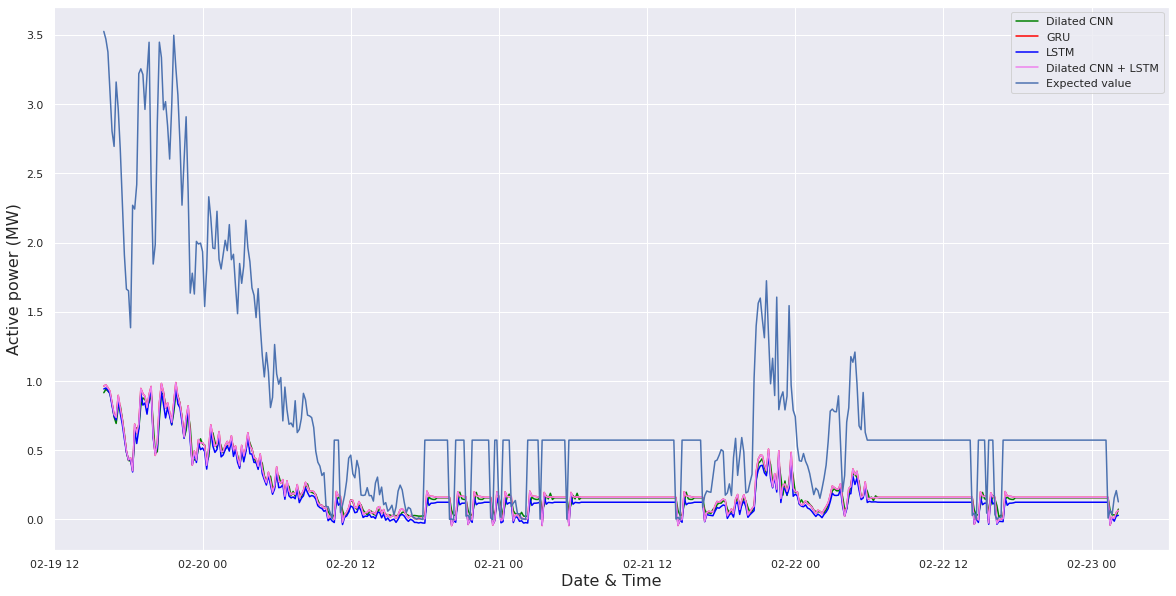

In [95]:
import matplotlib.pyplot as plt
x=np.array(eval_df['Date & Time'])
y=np.array(eval_df['actual'])
plt.figure(figsize=(20,10))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)

plt.rc('axes', labelsize=15)
plt.plot(x,predictions_1, color = 'green', label = 'Dilated CNN')
plt.plot(x,predictions_2, color = 'red', label = 'GRU')
plt.plot(x,predictions_3, color = 'blue', label = 'LSTM')
plt.plot(x,predictions_2, color = 'violet', label = 'Dilated CNN + LSTM')
plt.plot(x,y, 'b', label = 'Expected value')
# ax.plot(line_2, color = 'red', label = 'Line 2')
plt.legend()
plt.savefig("benchmark.png")
plt.show()


In [49]:
eval_df.plot(x='Date & Time', y=predictions_1,predictions_2,predictions_3,predictions_4 ,fontsize=12, figsize=(15, 8))
plt.title("Dilated CNN vs GRU vsLSTM vs Dilated CNN + Stacked LSTM",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Dilated CNN','GRU','LSTM','Dilated CNN+Stacked LSTM'])
#plt.savefig("benchmark.pdf")
plt.savefig("benchmark.png")
plt.show()

SyntaxError: ignored

In [ ]:
style=['g'.,'--b']
